# Landslide geometry

Plotting each attribute of the data sets to look for correlations or patterns. Data is collected from ArcGIS mapping that I have conducted on the 2019 and 2017 landslides, as well as work completed by Mariel on her mapped landslides (marielslides.csv). 

### To do 
** still does not include what geologic formation the landslide lies on and the structure of the landslide

** Need to add units to everything

In [5]:
import numpy as np
import pandas as pd
import matplotlib as mp
import seaborn as sns

# Read dataset
RH = pd.read_csv('rhonda_classified.csv')

## if I wanted to round the slopes, etc
#RH.MEAN.apply(np.round)
#df.MEAN = df.MEAN.round()

mariel2017 = pd.read_csv('mariel_classified.csv')

others2019 = pd.read_csv('other2019_classified.csv')

missed2017 = pd.read_csv('missed_classified.csv')

concatenated = pd.concat([mariel2017.assign(dataset='set1'), others2019.assign(dataset='set2'), 
                          missed2017.assign(dataset='set3'), RH.assign(dataset='set4')], sort=False)

normalized = pd.read_csv('geologic_unit_geom.csv')

normalized.head()

,FID,OBJECTID,class,shape_area,perimeter,num_slides,norm_area,*100000
0,0.0,3.0,3b,3.275260e+06,17047.64262,231.0,0.000070,7.052874
1,1.0,4.0,3c,7.512256e+05,18486.84349,48.0,0.000064,6.389559
2,2.0,2.0,3a,1.151723e+06,11123.59807,42.0,0.000036,3.646710
3,3.0,7.0,2c,4.408542e+06,32375.82843,124.0,0.000028,2.812721
4,4.0,6.0,2b,3.479219e+06,43062.26407,166.0,0.000048,4.771186


## Plotting the landslides based on their classification. 

Class names from Rich. Trend towards sliding in 2B and 3B, which is the interbedded sandstones and shales.

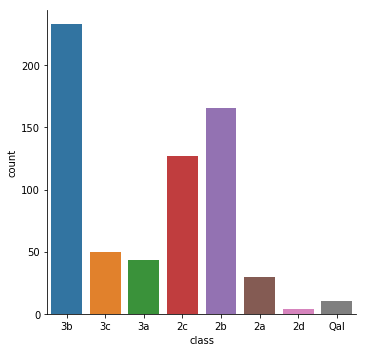

In [8]:
sns.catplot(x="class", data=concatenated, kind="count")

## Normalize over area

http://www.pbcgis.com/normalize/

Since each of the units covers different areas, the data needs to be normalized to be sure that the abundance of slides in the 2b and 3b units is not based on them covering a larger percentage of the study area.

To normalize, I divided the landslide counts by population and graphed the percentage. 

Unfotunately, there seems to be less of a inclination towards the 2B/3B slides; however, not sure if this was the best way to normalize. 

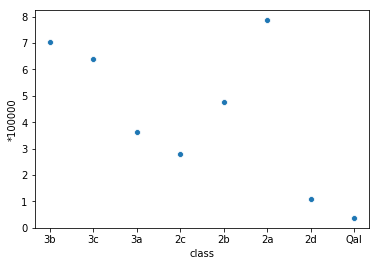

In [6]:
ax = sns.scatterplot(x="class", y="*100000", data=normalized)

## Slide Lengths

Vary from around 2 - 25 meters, with many in 2017 extending beyond to almost 70

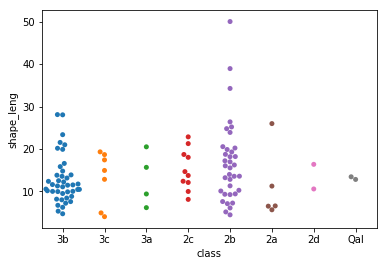

In [13]:
#ax = RH.plot(kind='scatter', x ='FID', y='SHAPE_Length', color='LightBlue', label='Rhondas Hill')

#mariel2017.plot(kind='scatter', x ='FID', y='Shape_Leng', color='LightGreen', label='Mariel Slides', ax=ax)
#others2019.plot(kind='scatter', x = 'FID', y='SHAPE_Length', color = 'Blue', label = '2019 Slides', ax=ax)
#missed2017.plot(kind='scatter', x = 'class', y='SHAPE_Length', color = 'Green', label = '2017 Slides', ax=ax)

#ax.set_xlabel("Slide ID")
#ax.set_ylabel("Length")

sns.swarmplot(x="class", y="shape_leng", data=concatenated)


## Slide areas

Most of the landslides are less than 100; however, there are many in 2017 that exceeded this size. 

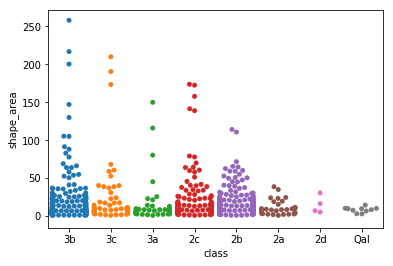

In [12]:
#ax = RH.plot(kind='scatter', x ='OBJECTID', y='SHAPE_Area', color='Yellow', label='Rhondas Hill')
#mariel2017.plot(kind='scatter', x ='FID', y='Shape_Area', color='Pink', label='Mariel Slides', ax=ax)
#others2019.plot(kind='scatter', x = 'OBJECTID', y='SHAPE_Area', color = 'Orange', label = '2019 Slides', ax=ax)
#missed2017.plot(kind='scatter', x = 'OBJECTID', y='SHAPE_Area', color = 'Red', label = '2017 Slides', ax=ax)

#ax.set_xlabel("Slide ID")
#ax.set_ylabel("Area")

sns.swarmplot(x="class", y="shape_area", data=concatenated)


## Average slope

Range of 20-50 percent slopes, no correlations

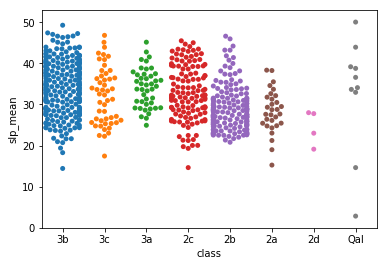

In [11]:
#ax = RH.plot(kind='scatter', x ='OBJECTID', y='MEAN', color='Grey', label='Rhondas Hill')
#mariel2017.plot(kind='scatter', x ='FID', y='slp_mean', color='#E6CCFF', label='Mariel Slides', ax=ax)
#others2019.plot(kind='scatter', x = 'OBJECTID', y='MEAN', color = 'Black', label = '2019 Slides', ax=ax)
#missed2017.plot(kind='scatter', x = 'OBJECTID', y='MEAN', color = 'Purple', label = '2017 Slides', ax=ax)

#ax.set_xlabel("Slide ID")
#ax.set_ylabel("Slope")

# Want to plot without outlier, number 9 in "missed" slides data
#ax.set_ylim([0,60])

ax = sns.swarmplot(x="class", y="slp_mean", data=concatenated)


## Depth of surveyed slides

Most heavily concentrated around 0.5 meters. 

### To do
**would be interesting to add the elevation on the hill

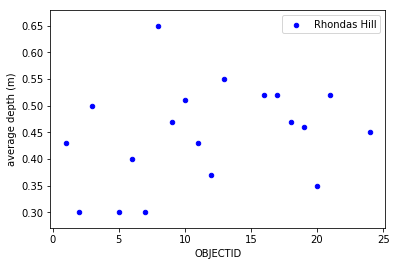

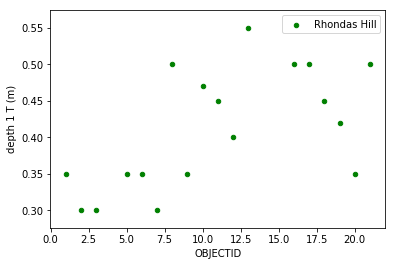

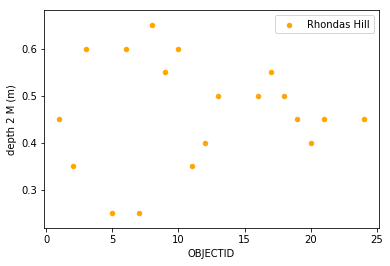

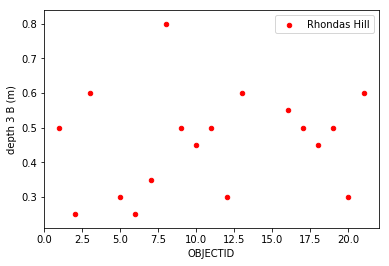

In [7]:
RH = RH[~(RH == 0).any(axis=1)]
RH.plot(kind='scatter', x ='OBJECTID', y='average depth (m)', color='Blue', label='Rhondas Hill')
RH.plot(kind='scatter', x ='OBJECTID', y='depth 1 T (m)', color='Green', label='Rhondas Hill')
RH.plot(kind='scatter', x ='OBJECTID', y='depth 2 M (m)', color='Orange', label='Rhondas Hill')
RH.plot(kind='scatter', x ='OBJECTID', y='depth 3 B (m)', color='Red', label='Rhondas Hill')